In [19]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [20]:
no_of_games_to_play = 7
no_of_times_to_simulate = 1000000

game_aa_win_points, game_aa_win_ratio, game_aa_lose_points = 1, 0.4803, -1  # 1, 0.48, -1  # 1, 0.47425, -1
game_b1_win_points, game_b1_win_ratio, game_b1_lose_points = 1, 0.10, -1  # 1, 0.10, -1  # 1, 0.10, -1
game_b2_win_points, game_b2_win_ratio, game_b2_lose_points = 1, 0.74, -1  # 1, 0.74, -1  # 1, 0.75, -1

points_1 = 99
points_2 = 100

In [21]:
def get_result(success_rate: float) -> bool:
    return rd.random() < success_rate


def play_game_a(curr_points: int) -> int:
    return curr_points + (game_aa_win_points if get_result(game_aa_win_ratio) else game_aa_lose_points)


def play_game_b(curr_points: int) -> int:
    if curr_points % 3 == 0:
        return curr_points + (game_b1_win_points if get_result(game_b1_win_ratio) else game_b1_lose_points)
    else:
        return curr_points + (game_b2_win_points if get_result(game_b2_win_ratio) else game_b2_lose_points)

In [22]:
max_points_1, min_points_1 = points_1, points_1
max_points_2, min_points_2 = points_2, points_2
sequence_use_count_1, sequence_success_count_1 = {}, {}
sequence_use_count_2, sequence_success_count_2 = {}, {}
consecutive_execution_result_1, consecutive_execution_result_2 = [], []

curr_points_1 = points_1
curr_points_2 = points_2

for i in range(no_of_times_to_simulate):
    points_before, sequence = curr_points_1, ""
    for j in range(no_of_games_to_play):
        if get_result(0.5):
            sequence += "a,"
            curr_points_1 = play_game_a(curr_points_1)
        else:
            sequence += "b,"
            curr_points_1 = play_game_b(curr_points_1)
    sequence = sequence.strip(",")
    consecutive_execution_result_1.append(curr_points_1)
    if curr_points_1 > max_points_1:
        max_points_1 = curr_points_1
    if curr_points_1 < min_points_1:
        min_points_1 = curr_points_1
    sequence_use_count_1[sequence] = sequence_use_count_1.get(sequence, 0) + 1
    if curr_points_1 > points_before:
        sequence_success_count_1[sequence] = sequence_success_count_1.get(sequence, 0) + 1

    points_before, sequence = curr_points_2, ""
    for j in range(no_of_games_to_play):
        if get_result(0.5):
            sequence += "a,"
            curr_points_2 = play_game_a(curr_points_2)
        else:
            sequence += "b,"
            curr_points_2 = play_game_b(curr_points_2)
    sequence = sequence.strip(",")
    consecutive_execution_result_2.append(curr_points_2)
    if curr_points_2 > max_points_2:
        max_points_2 = curr_points_2
    if curr_points_2 < min_points_2:
        min_points_2 = curr_points_2
    sequence_use_count_2[sequence] = sequence_use_count_2.get(sequence, 0) + 1
    if curr_points_2 > points_before:
        sequence_success_count_2[sequence] = sequence_success_count_2.get(sequence, 0) + 1

dict_keys = list(sequence_use_count_1.keys())
dict_keys.sort()
sequence_use_count_1 = {i: sequence_use_count_1[i] for i in dict_keys}

dict_keys = list(sequence_use_count_2.keys())
dict_keys.sort()
sequence_use_count_2 = {i: sequence_use_count_2[i] for i in dict_keys}

dict_keys = list(sequence_success_count_1.keys())
dict_keys.sort()
sequence_success_count_1 = {i: sequence_success_count_1[i] for i in dict_keys}

dict_keys = list(sequence_success_count_2.keys())
dict_keys.sort()
sequence_success_count_2 = {i: sequence_success_count_2[i] for i in dict_keys}

In [23]:
print(f"Min, Curr, Max points for Type 1 Initiations: {min_points_1}, {curr_points_1}, {max_points_1}")
print(f"Min, Curr, Max points for Type 2 Initiations: {min_points_2}, {curr_points_2}, {max_points_2}")

Min, Curr, Max points for Type 1 Initiations: -1924, -441, 2143
Min, Curr, Max points for Type 2 Initiations: -1303, 3168, 3722


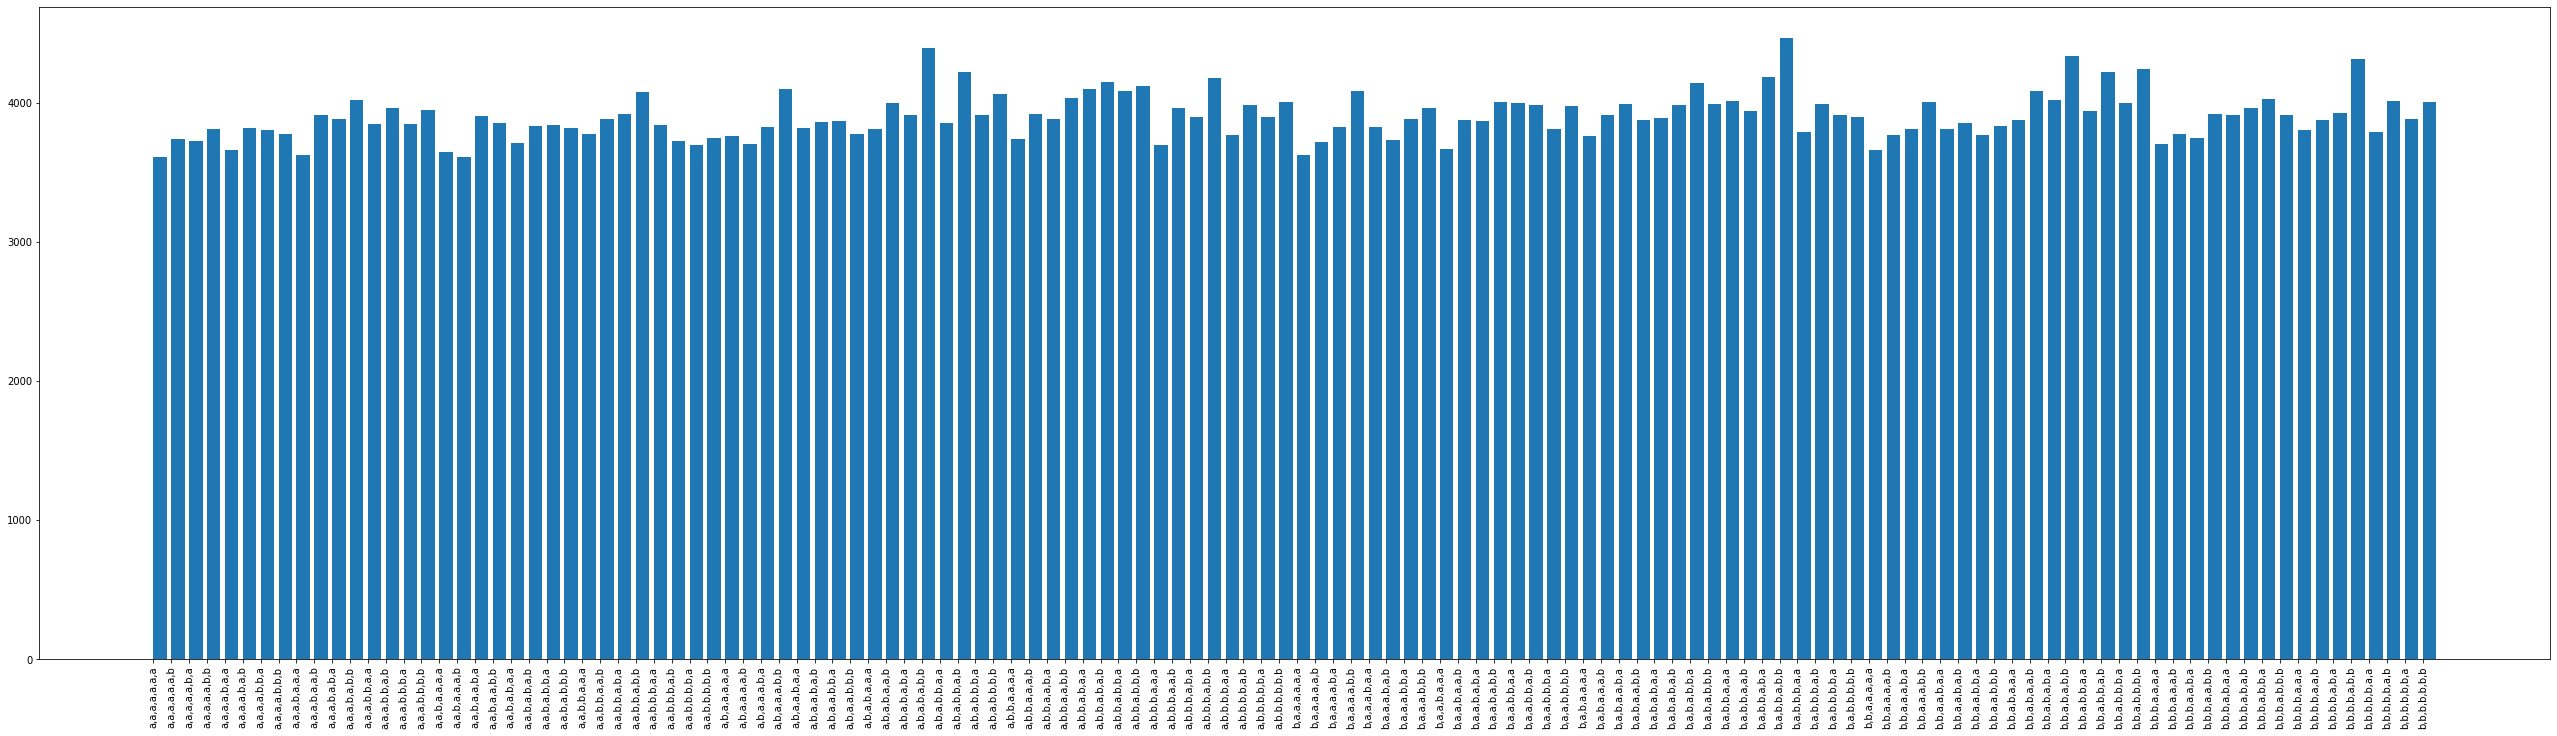

In [24]:
x_points = np.array(list(sequence_success_count_1.keys()))
y_points = np.array(list(sequence_success_count_1.values()))
plt.figure(figsize=(45, 12))
plt.xticks(rotation='vertical')
plt.bar(x_points, y_points, align='edge', width=0.75)
plt.show()

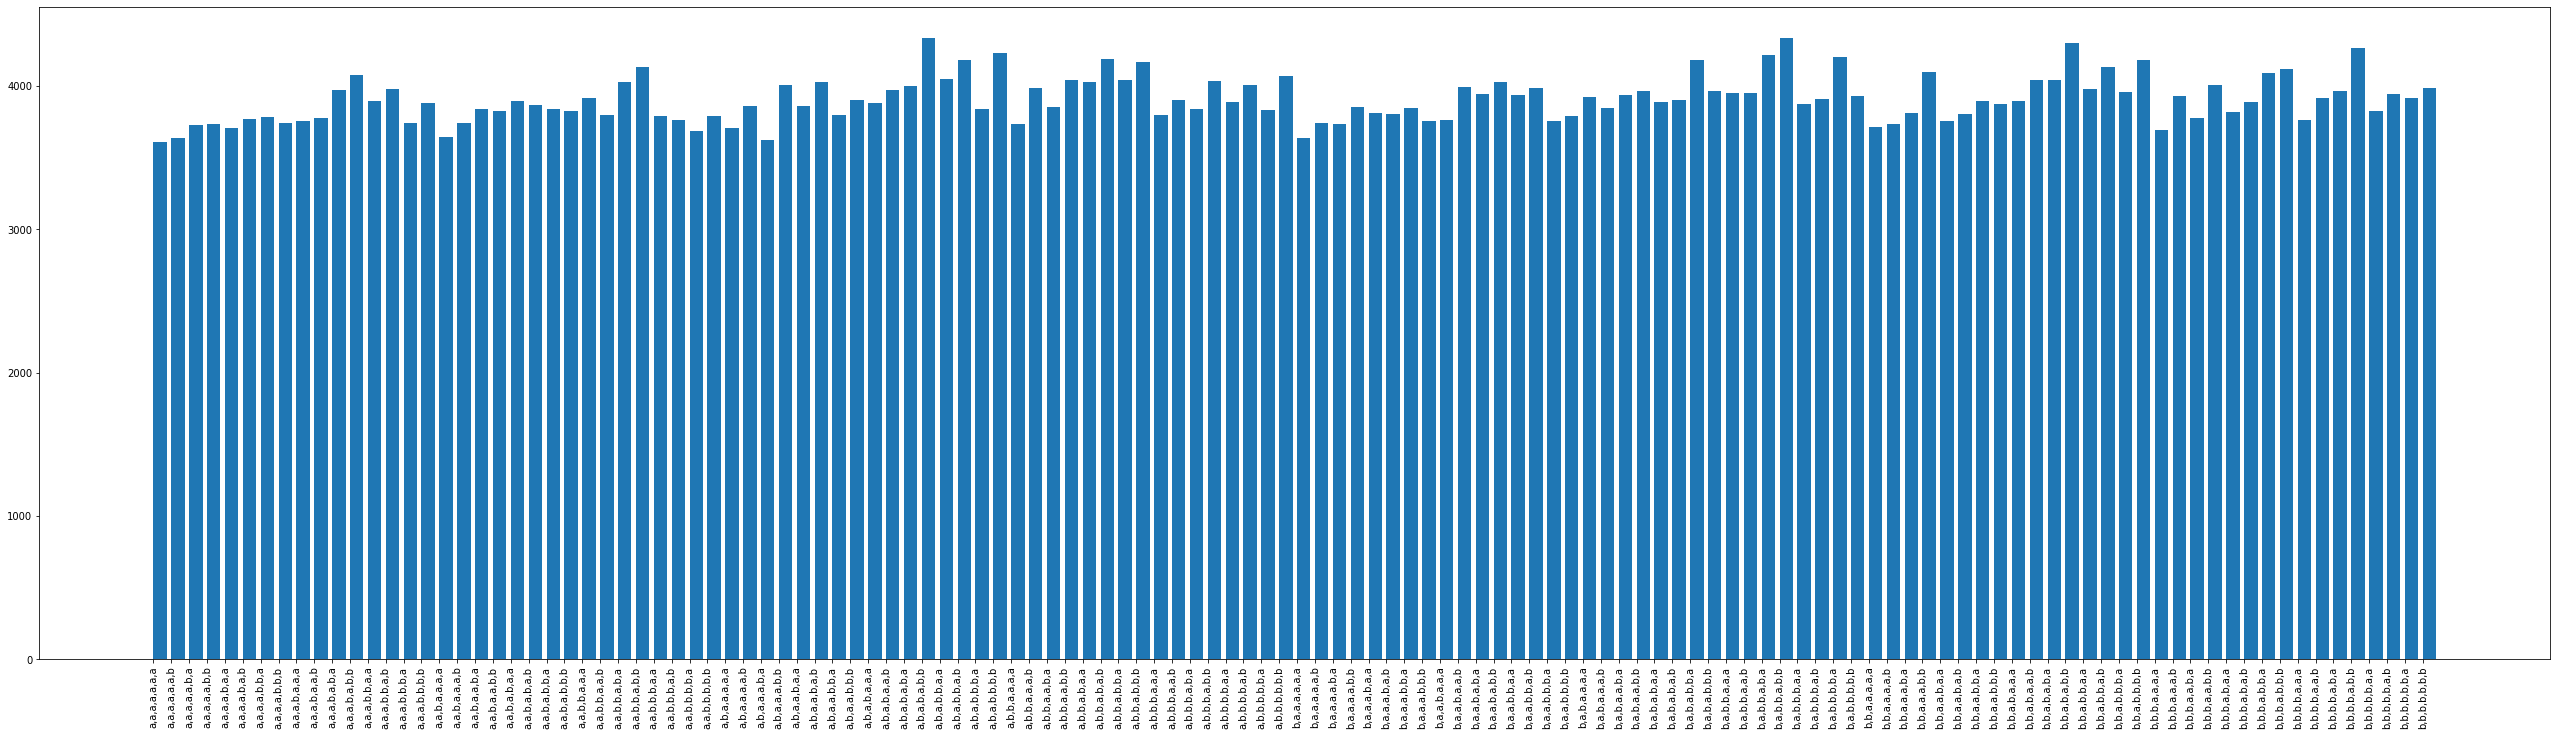

In [25]:
x_points = np.array(list(sequence_success_count_2.keys()))
y_points = np.array(list(sequence_success_count_2.values()))
plt.figure(figsize=(45, 12))
plt.xticks(rotation='vertical')
plt.bar(x_points, y_points, align='edge', width=0.75)
plt.show()

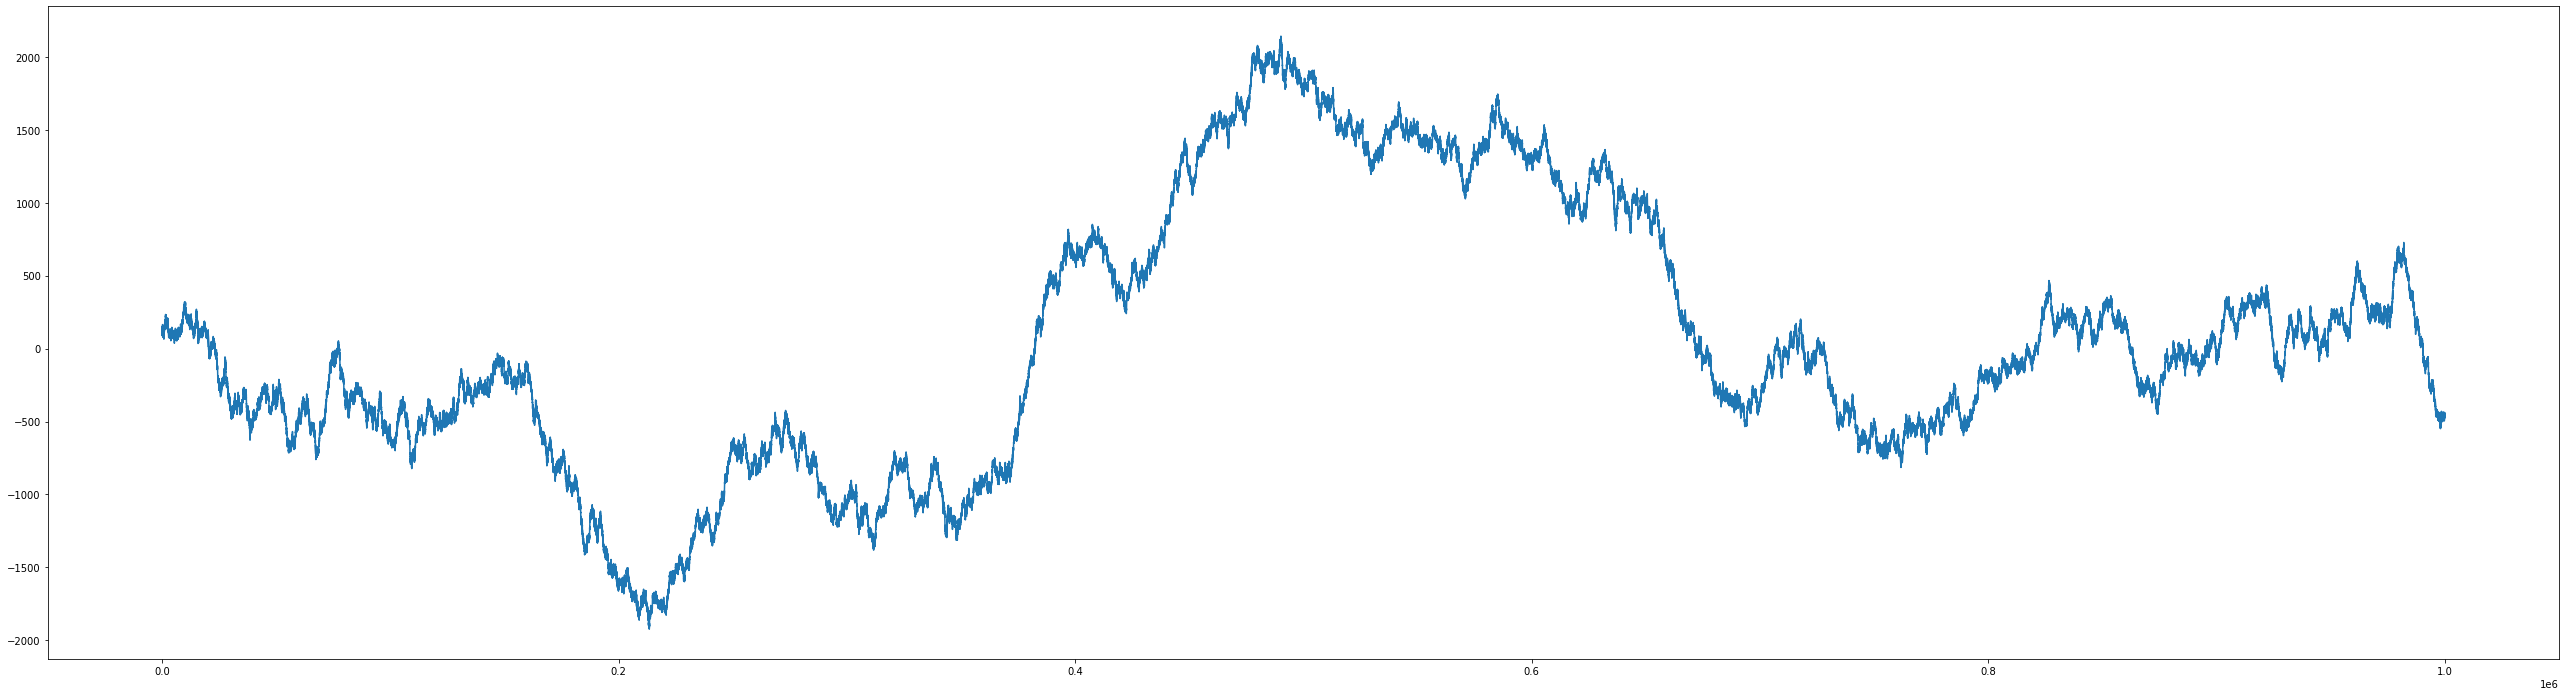

In [26]:
y_points = np.array(consecutive_execution_result_1)
plt.figure(figsize=(45, 12))
plt.plot(y_points)
plt.show()

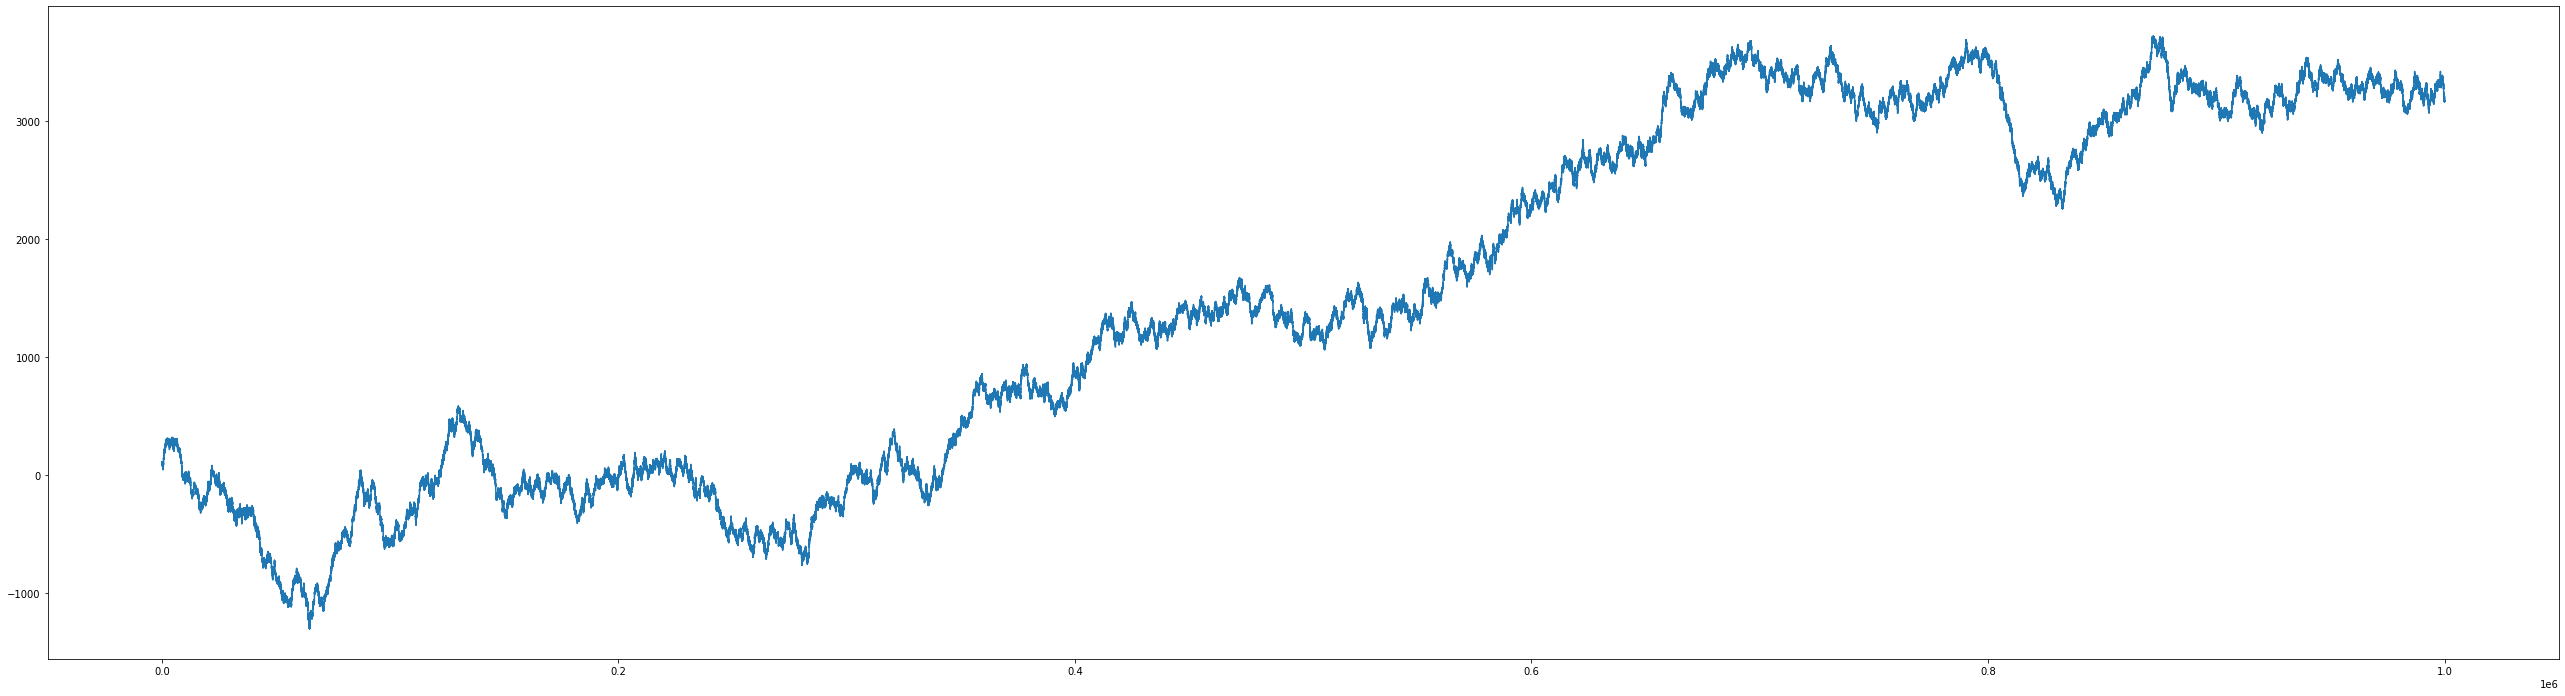

In [27]:
y_points = np.array(consecutive_execution_result_2)
plt.figure(figsize=(45, 12))
plt.plot(y_points)
plt.show()